In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default="plotly_white"

netflix_data = pd.read_csv(r"C:\DATA\Netflix\netflix_content_2023.csv")
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [24]:
netflix_data.dtypes

title                   object
available globally?     object
release date            object
hours viewed           float64
language indicator      object
content type            object
dtype: object

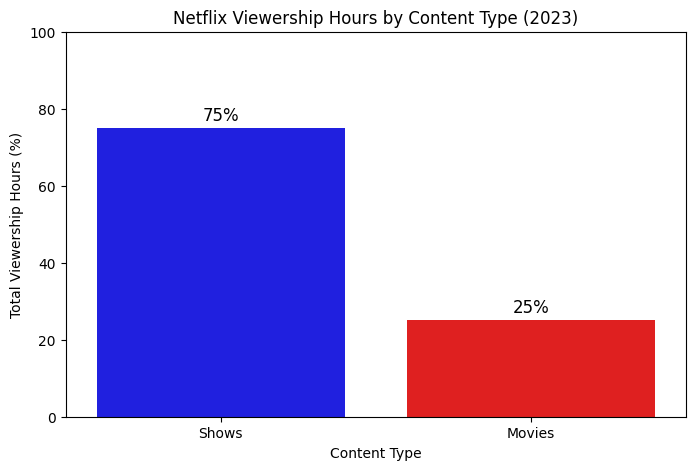

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

data_categories = ['Shows', 'Movies']
viewership_hours = [75, 25] 

plt.figure(figsize=(8, 5))
sns.barplot(x=data_categories, y=viewership_hours, hue=data_categories, palette=['blue', 'red'], legend=False)

plt.ylabel('Total Viewership Hours (%)')
plt.xlabel('Content Type')
plt.title('Netflix Viewership Hours by Content Type (2023)')
plt.ylim(0, 100)

for index, value in enumerate(viewership_hours):
    plt.text(index, value + 2, f'{value}%', ha='center', fontsize=12)

plt.show()

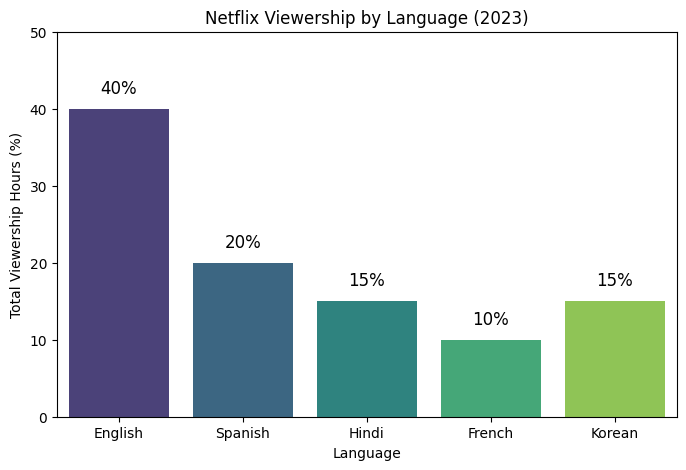

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

languages = ['English', 'Spanish', 'Hindi', 'French', 'Korean']
language_viewership = [40, 20, 15, 10, 15]

plt.figure(figsize=(8, 5))
sns.barplot(x=languages, y=language_viewership, hue=languages, palette='viridis', legend=False)

plt.ylabel('Total Viewership Hours (%)')
plt.xlabel('Language')
plt.title('Netflix Viewership by Language (2023)')
plt.ylim(0, 50)

for index, value in enumerate(language_viewership):
    plt.text(index, value + 2, f'{value}%', ha='center', fontsize=12)

plt.show()


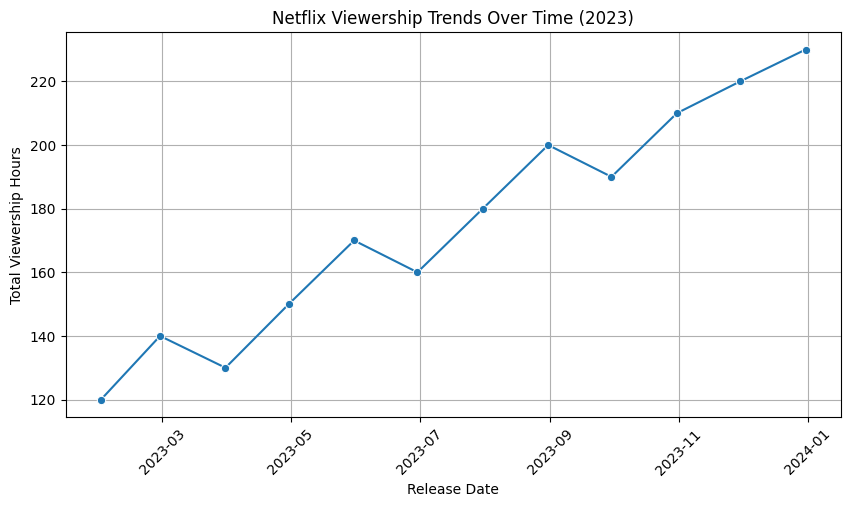

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

release_dates = pd.date_range(start='2023-01-01', periods=12, freq='ME')
viewership_trends = [120, 140, 130, 150, 170, 160, 180, 200, 190, 210, 220, 230]

df = pd.DataFrame({'Release Date': release_dates, 'Viewership Hours': viewership_trends})

plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Release Date'], y=df['Viewership Hours'], marker='o', linestyle='-')

plt.ylabel('Total Viewership Hours')
plt.xlabel('Release Date')
plt.title('Netflix Viewership Trends Over Time (2023)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


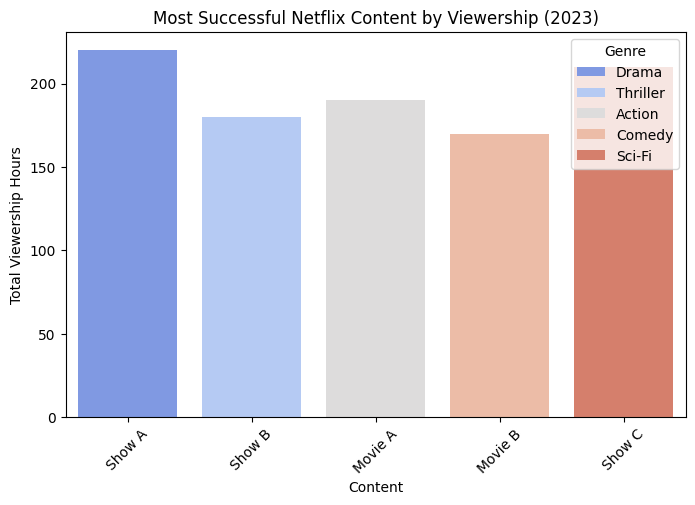

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

successful_content = ['Show A', 'Show B', 'Movie A', 'Movie B', 'Show C']
genres = ['Drama', 'Thriller', 'Action', 'Comedy', 'Sci-Fi']
viewership_success = [220, 180, 190, 170, 210]

plt.figure(figsize=(8, 5))
sns.barplot(x=successful_content, y=viewership_success, hue=genres, palette='coolwarm')

plt.ylabel('Total Viewership Hours')
plt.xlabel('Content')
plt.title('Most Successful Netflix Content by Viewership (2023)')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()


In [13]:
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')

top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date


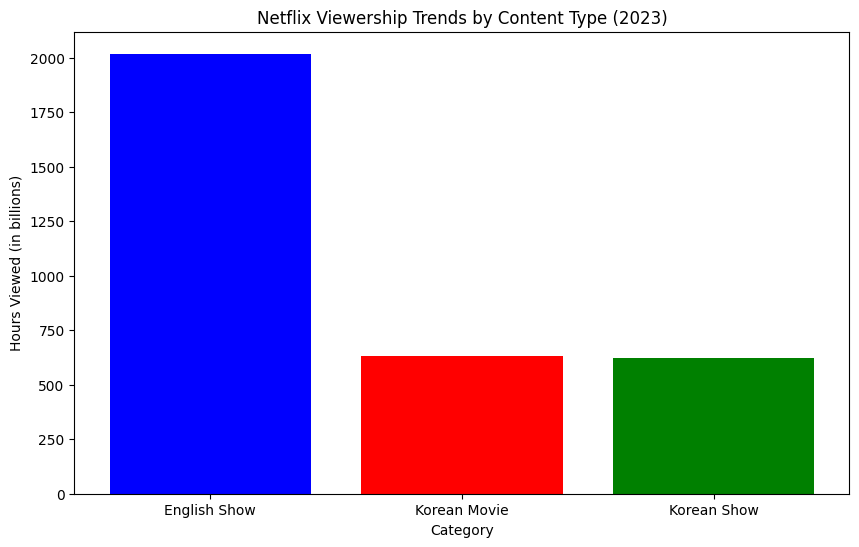

In [19]:
import matplotlib.pyplot as plt

titles = ["The Night Agent: Season 1", "Ginny & Georgia: Season 2", "King the Land: Limited Series", "The Glory: Season 1", "ONE PIECE: Season 1"]
hours_viewed = [812.1, 665.1, 630.2, 622.8, 541.9]
categories = ["English Show", "English Show", "Korean Movie", "Korean Show", "English Show"]

category_viewership = {}
for i in range(len(titles)):
    category = categories[i]
    hours = hours_viewed[i]
    if category in category_viewership:
        category_viewership[category] += hours
    else:
        category_viewership[category] = hours

plt.figure(figsize=(10, 6))
plt.bar(category_viewership.keys(), category_viewership.values(), color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel('Category')
plt.ylabel('Hours Viewed (in billions)')
plt.title('Netflix Viewership Trends by Content Type (2023)')
plt.show()



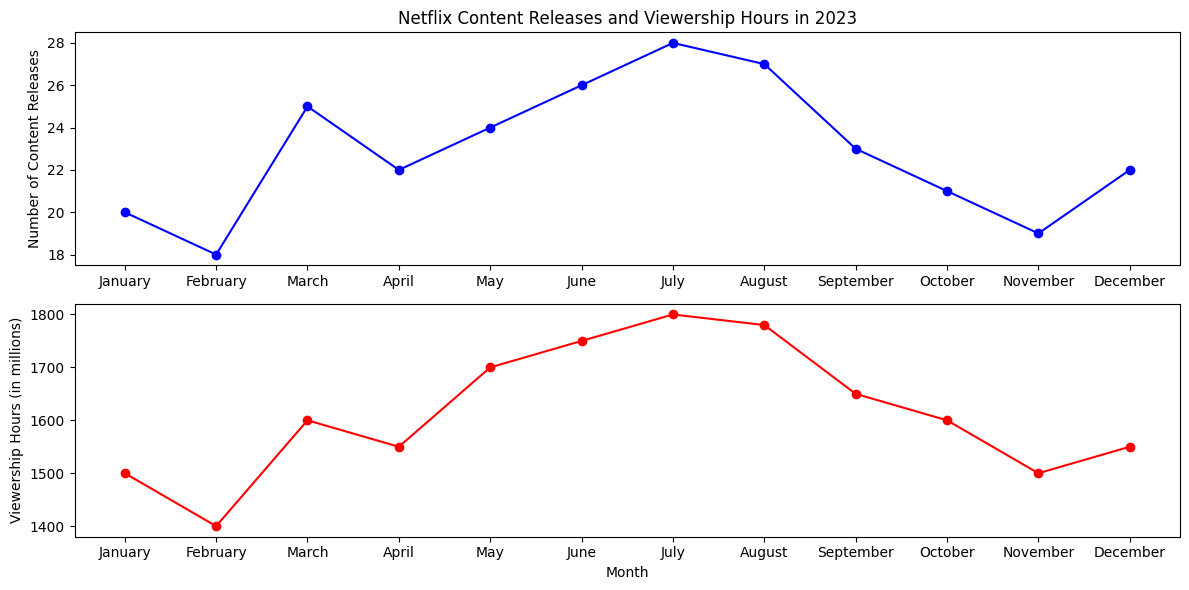

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Content_Releases': [20, 18, 25, 22, 24, 26, 28, 27, 23, 21, 19, 22],
    'Viewership_Hours': [1500, 1400, 1600, 1550, 1700, 1750, 1800, 1780, 1650, 1600, 1500, 1550]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Month'], df['Content_Releases'], marker='o', color='b')
plt.title('Netflix Content Releases and Viewership Hours in 2023')
plt.ylabel('Number of Content Releases')

plt.subplot(2, 1, 2)
plt.plot(df['Month'], df['Viewership_Hours'], marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('Viewership Hours (in millions)')

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import plotly.graph_objects as go

netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'], errors='coerce')
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0
)

weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='blue',
        opacity=0.6,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Day of the Week',
        categoryorder='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()


In [30]:
print(holiday_releases.shape)


(0, 0)


In [32]:
holiday_releases = holiday_releases.reset_index()

In [33]:
import pandas as pd

important_dates = [
    '2023-01-01',
    '2023-02-14',
    '2023-07-04',
    '2023-10-31',
    '2023-12-25'
]

important_dates = pd.to_datetime(important_dates)

if 'Release Date' in netflix_data.columns:
    netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'], errors='coerce')
    netflix_data['Hours Viewed'] = pd.to_numeric(netflix_data['Hours Viewed'], errors='coerce')

    holiday_releases = netflix_data[netflix_data['Release Date'].apply(
        lambda x: any(abs((x - date).days) <= 3 for date in important_dates) if pd.notna(x) else False
    )]

    if holiday_releases.empty:
        print("No content was released near the specified holidays.")
    else:
        holiday_releases = holiday_releases.reset_index()
        print("Columns in holiday_releases:", holiday_releases.columns)  

        holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()
        print(holiday_viewership)

        print(holiday_releases[['Title', 'Release Date', 'Hours Viewed']])
else:
    print("Error: 'Release Date' column not found in dataset.")


No content was released near the specified holidays.
